In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brats-2021-task1/BraTS2021_00495.tar
/kaggle/input/brats-2021-task1/BraTS2021_Training_Data.tar
/kaggle/input/brats-2021-task1/BraTS2021_00621.tar


In [2]:
# unzip the dataset
!tar -xvf /kaggle/input/brats-2021-task1/BraTS2021_Training_Data.tar
!tar -xvf /kaggle/input/brats-2021-task1/BraTS2021_00621.tar

./
./.DS_Store
./BraTS2021_00000/
./BraTS2021_00000/BraTS2021_00000_flair.nii.gz
./BraTS2021_00000/BraTS2021_00000_seg.nii.gz
./BraTS2021_00000/BraTS2021_00000_t1.nii.gz
./BraTS2021_00000/BraTS2021_00000_t1ce.nii.gz
./BraTS2021_00000/BraTS2021_00000_t2.nii.gz
./BraTS2021_00002/
./BraTS2021_00002/BraTS2021_00002_flair.nii.gz
./BraTS2021_00002/BraTS2021_00002_seg.nii.gz
./BraTS2021_00002/BraTS2021_00002_t1.nii.gz
./BraTS2021_00002/BraTS2021_00002_t1ce.nii.gz
./BraTS2021_00002/BraTS2021_00002_t2.nii.gz
./BraTS2021_00003/
./BraTS2021_00003/BraTS2021_00003_flair.nii.gz
./BraTS2021_00003/BraTS2021_00003_seg.nii.gz
./BraTS2021_00003/BraTS2021_00003_t1.nii.gz
./BraTS2021_00003/BraTS2021_00003_t1ce.nii.gz
./BraTS2021_00003/BraTS2021_00003_t2.nii.gz
./BraTS2021_00005/
./BraTS2021_00005/BraTS2021_00005_flair.nii.gz
./BraTS2021_00005/BraTS2021_00005_seg.nii.gz
./BraTS2021_00005/BraTS2021_00005_t1.nii.gz
./BraTS2021_00005/BraTS2021_00005_t1ce.nii.gz
./BraTS2021_00005/BraTS2021_00005_t2.nii.gz
./Bra

In [3]:
!pip -q install monai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 15.9 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 25.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 11.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 66.7 MB/s eta 0:00:00:00:0100:01


## View a sample of the dataset

In [19]:
from monai.transforms import (
    Compose, LoadImaged, EnsureChannelFirstd, Orientationd, Spacingd, NormalizeIntensityd,
    RandFlipd, RandRotate90d, RandScaleIntensityd, RandShiftIntensityd, RandGaussianNoised, ToTensord
)
import matplotlib.pyplot as plt
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import os

In [20]:
loader = LoadImage(image_only=False)
image, meta_data = loader("/kaggle/working/BraTS2021_00621_t2.nii.gz")

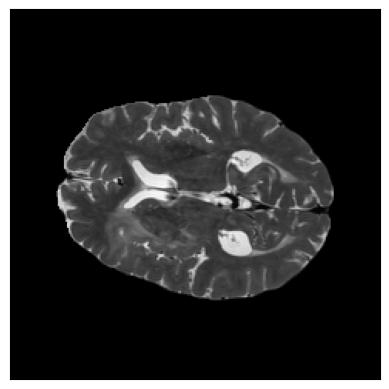

In [6]:
# visualize image
image_slice = image[:, :, 75] #75 slice
plt.imshow(image_slice, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

## Create the transformation pipeline

## Define Custom Dataloader

In [38]:
keys = ["flair", "t1", "t1ce", "t2", "seg"]
image_keys = keys[:-1]  # all except 'seg'
label_key = "seg"

from monai.transforms import Resized

transform = Compose([
    LoadImaged(keys=keys),
    EnsureChannelFirstd(keys=keys),
    Orientationd(keys=keys, axcodes="RAS"),
    Spacingd(keys=image_keys, pixdim=(1.0, 1.0, 1.0), mode="bilinear"),
    Spacingd(keys=label_key, pixdim=(1.0, 1.0, 1.0), mode="nearest"),
    NormalizeIntensityd(keys=image_keys, nonzero=True, channel_wise=True),
    Resized(
        keys=keys,
        spatial_size=(224, 224, 160),
        mode="bilinear",  # 'nearest' for labels (but MONAI handles it automatically)
    ),
    RandFlipd(keys=keys, spatial_axis=0, prob=0.5),
    RandRotate90d(keys=keys, prob=0.5),
    RandScaleIntensityd(keys=image_keys, factors=0.1, prob=0.5),
    RandShiftIntensityd(keys=image_keys, offsets=0.1, prob=0.5),
    RandGaussianNoised(keys=image_keys, prob=0.2),
    
    ToTensord(keys=keys),
])

In [39]:
class BRATSDataset(Dataset):
    def __init__(self, data_dir, transform=None, mode="train", patient_id=None):
        self.data_dir = data_dir
        self.mode = mode
        self.transform = transform

        if patient_id:
            self.patient_id = patient_id
        else:
            self.patient_id = [d for d in os.listdir(data_dir) 
                               if os.path.isdir(os.path.join(data_dir, d))]

    def __len__(self):
        return len(self.patient_id)

    def __getitem__(self, idx):
        pid = self.patient_id[idx]
        base_path = os.path.join(self.data_dir, pid)

        item = {
            "flair": os.path.join(base_path, f"{pid}_flair.nii.gz"),
            "t1": os.path.join(base_path, f"{pid}_t1.nii.gz"),
            "t1ce": os.path.join(base_path, f"{pid}_t1ce.nii.gz"),
            "t2": os.path.join(base_path, f"{pid}_t2.nii.gz"),
        }

        if self.mode == "train":
            item["seg"] = os.path.join(base_path, f"{pid}_seg.nii.gz")

        if self.transform:
            item = self.transform(item)

        return item

In [40]:
data_dir = "/kaggle/working/"
dataset = BRATSDataset(data_dir, mode='train',transform=transform)

In [41]:
dataloader = DataLoader(dataset=dataset, batch_size=2, shuffle=True)

In [42]:
for batch in dataloader:
    print(type(batch))
    print(len(batch))
    break

<class 'dict'>
5


### Train the model

In [43]:
from monai.networks.nets import SwinUNETR
from monai.losses import DiceCELoss
import torch

In [47]:
model = SwinUNETR(
    img_size=(96, 96, 64),  # Default size (divisible by 32)
    in_channels=1,
    out_channels=1,
    feature_size=48,
    drop_rate=0.0,
    use_checkpoint=True,
).to(device)

loss_function = DiceCELoss(to_onehot_y=False, sigmoid=True)
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-5)

In [ ]:
# Model initialization
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SwinUNETR(
    img_size=(256, 256, 160),  # Must match padded size
    in_channels=1,             # 1 channel per modality (change if concatenating)
    out_channels=1,
    feature_size=48,
    use_checkpoint=True
).to(device)

# Loss and optimizer
loss_function = DiceCELoss(to_onehot_y=False, sigmoid=True)
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-5)

# Training setup
max_epochs = 10
val_interval = 5
best_metric = -1
best_metric_epoch = -1
epoch_loss_values = []

os.makedirs("./checkpoints", exist_ok=True)

# Training loop
for epoch in range(max_epochs):
    print(f"Epoch {epoch + 1}/{max_epochs}")
    model.train()
    epoch_loss = 0
    
    for batch_data in dataloader:
        inputs = batch_data["t1ce"].to(device)  
        labels = batch_data["seg"].to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    
    epoch_loss /= len(dataloader)
    epoch_loss_values.append(epoch_loss)
    print(f"Epoch {epoch + 1} average loss: {epoch_loss:.4f}")
    
    # Save checkpoint
    if (epoch + 1) % val_interval == 0:
        checkpoint_path = f"./checkpoints/model_epoch{epoch+1}.pth"
        torch.save({
            "epoch": epoch + 1,
            "model_state_dict": model.state_dict(),
            "optimizer_state_dict": optimizer.state_dict(),
            "loss": epoch_loss,
        }, checkpoint_path)
        print(f"Checkpoint saved at {checkpoint_path}")


Epoch 1/1


In [ ]:
# Plot training curve
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, max_epochs + 1), epoch_loss_values, label="Train Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.legend()
plt.savefig("training_loss.png")
plt.show()
